### This notebook contains plots examining what relationship exists, if any, between LRG mass and the number of satellites it possesses. 

#### Mindy Townsned
#### Last edit: 24 July 2018

In [1]:
run ~/anaconda/GitHub/lrg-project/statSub_Mark2.py

end data parsing
end CosmoCalc
end surface density calculation
end near neighbor calculation
(1151, 10, 10)
(1151,)
end background galaxy calculation
1151
end satellite galaxy calculation
end of program


In [2]:
sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

In [3]:
sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

In [4]:
# Read in data
data = open('/Users/mtownsend/anaconda/Github/lrg-project/lrg_project_masses2.txt', 'r') 
lines = data.readlines()[23:] # start reading at line 24

data.close() 

# Create array
mass_mod = []
z_mod = []

# Append data to the array
for line in lines:
    p = line.split()
    z_mod.append(float(p[0]))
    mass_mod.append(float(p[2]))
    
# print(z_mod)
# print(mass_mod)

In [5]:
# gives index for model redshifts in LRG order

temp = []
for i in range(len(z_LRG)):
    temp.append(min(range(len(z_mod)), key=lambda j:abs(z_mod[j] - z_LRG[i])))
    
# gives model masses in LRG order

mass_LRG = []
for i in range(len(temp)):
    mass_LRG.append(mass_mod[int(temp[i])])
    
print(type(mass_LRG[0]))
mass_LRG = np.array(mass_LRG)

<class 'float'>


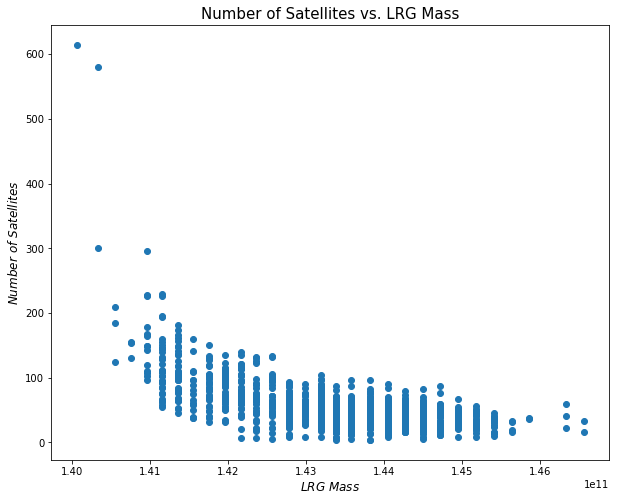

In [10]:
plt.rcParams["figure.figsize"] = [10,8]
plt.title("Number of Satellites vs. LRG Mass", fontsize=15)
plt.scatter(mass_LRG, sumsat)
plt.xlabel(r'$LRG$ $Mass$', fontsize = 12)
plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize = 12)
plt.show()

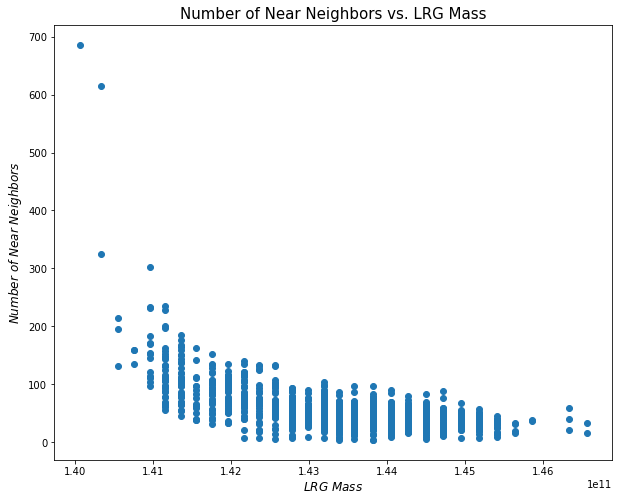

In [11]:
plt.rcParams["figure.figsize"] = [10,8]
plt.title("Number of Near Neighbors vs. LRG Mass", fontsize=15)
plt.scatter(mass_LRG, sumnear)
plt.xlabel(r'$LRG$ $Mass$', fontsize = 12)
plt.ylabel(r'$Number$ $of$ $Near$ $Neighbors$', fontsize = 12)
plt.show()

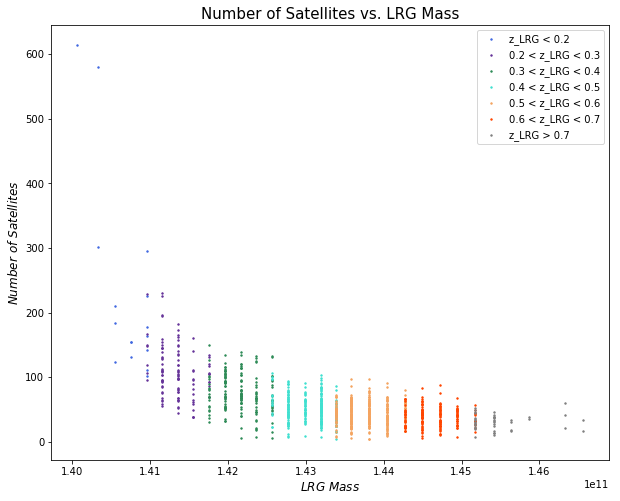

In [6]:
mass_LRG = np.asarray(mass_LRG)

mass1z = mass_LRG[np.where(z_LRG < 0.2)]
mass2z = mass_LRG[np.where((z_LRG >= 0.2) & (0.3 > z_LRG))]
mass3z = mass_LRG[np.where((z_LRG >= 0.3) & (0.4 > z_LRG))]
mass4z = mass_LRG[np.where((z_LRG >= 0.4) & (0.5 > z_LRG))]
mass5z = mass_LRG[np.where((z_LRG >= 0.5) & (0.6 > z_LRG))]
mass6z = mass_LRG[np.where((z_LRG >= 0.6) & (0.7 > z_LRG))]
mass7z = mass_LRG[np.where(z_LRG >= 0.7)]

plt.rcParams["figure.figsize"] = [10,8]
plt.title("Number of Satellites vs. LRG Mass", fontsize=15)
plt.scatter(mass1z, sumsat1z, s=2, color='royalblue', label='z_LRG < 0.2')
plt.scatter(mass2z, sumsat2z, s=2, color='rebeccapurple', label='0.2 < z_LRG < 0.3')
plt.scatter(mass3z, sumsat3z, s=2, color='seagreen', label='0.3 < z_LRG < 0.4')
plt.scatter(mass4z, sumsat4z, s=2, color='turquoise', label='0.4 < z_LRG < 0.5')
plt.scatter(mass5z, sumsat5z, s=2, color='sandybrown', label='0.5 < z_LRG < 0.6')
plt.scatter(mass6z, sumsat6z, s=2, color='orangered', label='0.6 < z_LRG < 0.7')
plt.scatter(mass7z, sumsat7z, s=2, color='grey', label='z_LRG > 0.7')
plt.xlabel(r'$LRG$ $Mass$', fontsize = 12)
plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize = 12)
plt.legend(loc='upper right')
plt.show()

In [10]:
# Divvy up by LRG mass slice

Nsat1mass = Nsat[np.where((mass_LRG >= 1.40e11) & (1.41e11 > mass_LRG))]
print(len(Nsat1mass))

sumsat1mass = []
for i in range(len(Nsat1mass)):
    sumsat1mass.append(np.sum(Nsat1mass[i]))

# 0.2 <= z < 0.3
Nsat2mass = Nsat[np.where((mass_LRG >= 1.41e11) & (1.42e11 > mass_LRG))]
print(len(Nsat2mass))

sumsat2mass = []
for i in range(len(Nsat2mass)):
    sumsat2mass.append(np.sum(Nsat2mass[i]))

# 0.3 <= z < 0.4
Nsat3mass = Nsat[np.where((mass_LRG >= 1.42e11) & (1.43e11 > mass_LRG))]
print(len(Nsat3mass))

sumsat3mass = []
for i in range(len(Nsat3mass)):
    sumsat3mass.append(np.sum(Nsat3mass[i]))

# 0.4 <= z < 0.5
Nsat4mass = Nsat[np.where((mass_LRG >= 1.43e11) & (1.44e11 > mass_LRG))]
print(len(Nsat4mass))

sumsat4mass = []
for i in range(len(Nsat4mass)):
    sumsat4mass.append(np.sum(Nsat4mass[i]))

# 0.5 <= z < 0.6
Nsat5mass = Nsat[np.where((mass_LRG >= 1.44e11) & (1.45e11 > mass_LRG))]
print(len(Nsat5mass))

sumsat5mass = []
for i in range(len(Nsat5mass)):
    sumsat5mass.append(np.sum(Nsat5mass[i]))

# 0.6 <= z < 0.7
Nsat6mass = Nsat[np.where((mass_LRG >= 1.45e11) & (1.46e11 > mass_LRG))]
print(len(Nsat6mass))

sumsat6mass = []
for i in range(len(Nsat6mass)):
    sumsat6mass.append(np.sum(Nsat6mass[i]))

# z >= 0.7
Nsat7mass = Nsat[np.where(mass_LRG >= 1.46e11)]
print(len(Nsat7mass))

sumsat7mass = []
for i in range(len(Nsat7mass)):
    sumsat7mass.append(np.sum(Nsat7mass[i]))

23
170
220
413
272
48
5


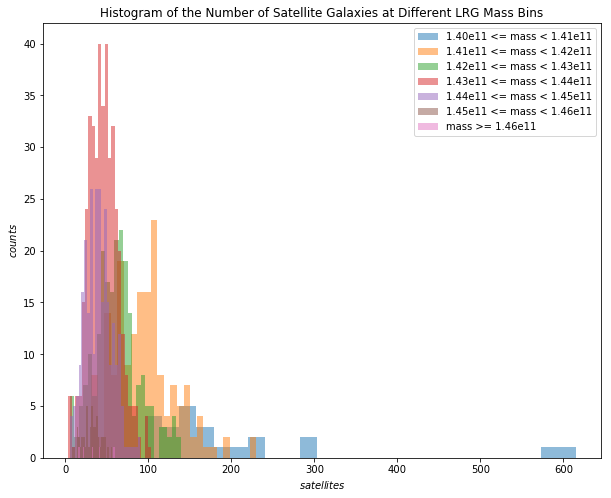

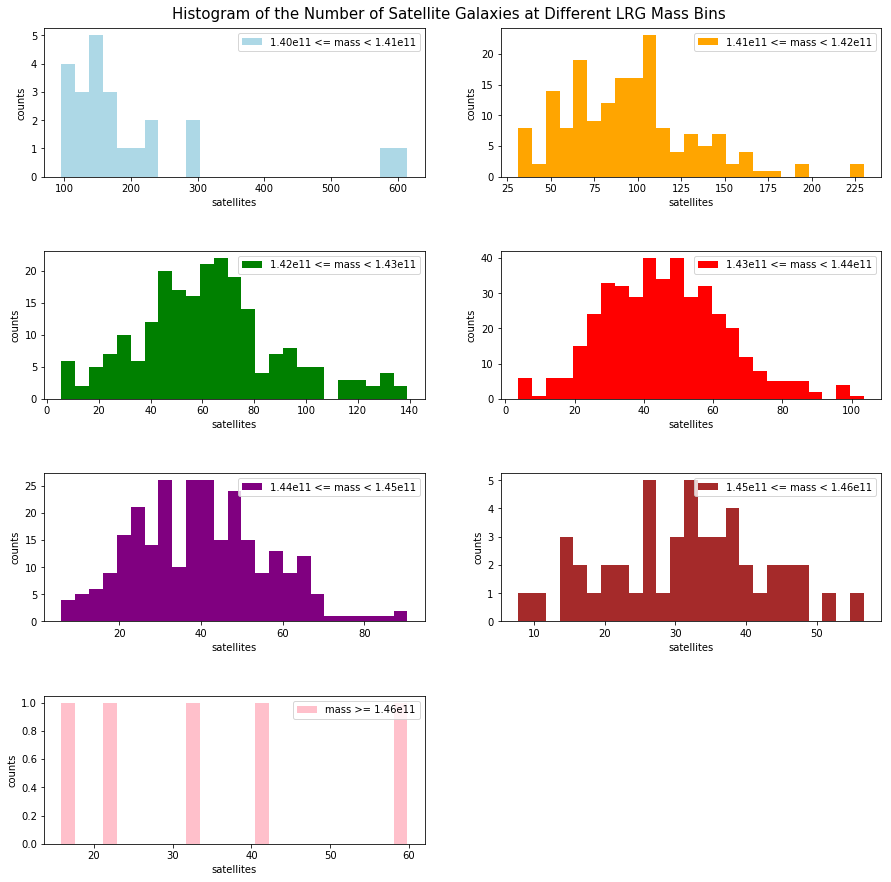

In [13]:
plt.title("Histogram of the Number of Satellite Galaxies at Different LRG Mass Bins")
plt.hist(sumsat1mass, bins=25, alpha=0.5, label='1.40e11 <= mass < 1.41e11')
plt.hist(sumsat2mass, bins=25, alpha=0.5, label='1.41e11 <= mass < 1.42e11')
plt.hist(sumsat3mass, bins=25, alpha=0.5, label='1.42e11 <= mass < 1.43e11')
plt.hist(sumsat4mass, bins=25, alpha=0.5, label='1.43e11 <= mass < 1.44e11')
plt.hist(sumsat5mass, bins=25, alpha=0.5, label='1.44e11 <= mass < 1.45e11')
plt.hist(sumsat6mass, bins=25, alpha=0.5, label='1.45e11 <= mass < 1.46e11')
plt.hist(sumsat7mass, bins=25, alpha=0.5, label='mass >= 1.46e11')
plt.xlabel(r'$satellites$')
plt.ylabel(r'$counts$')
plt.legend(loc='upper right')
plt.show()

f, axarr = plt.subplots(4, 2, figsize=(15,15))
f.suptitle("Histogram of the Number of Satellite Galaxies at Different LRG Mass Bins", fontsize=15, y=0.9)

axarr[0, 0].hist(sumsat1mass, bins=25, color='lightblue', label='1.40e11 <= mass < 1.41e11')
axarr[0, 0].legend(loc='upper right')
# 	axarr[0, 0].axvline(linewidth=1, color='black')

axarr[0, 1].hist(sumsat2mass, bins=25, color='orange',label='1.41e11 <= mass < 1.42e11')
axarr[0, 1].legend(loc='upper right')
# 	axarr[0, 1].axvline(linewidth=1, color='black')

axarr[1, 0].hist(sumsat3mass, bins=25, color='green', label='1.42e11 <= mass < 1.43e11')
axarr[1, 0].legend(loc='upper right')
# 	axarr[1, 0].axvline(linewidth=1, color='black')

axarr[1, 1].hist(sumsat4mass, bins=25, color='red', label='1.43e11 <= mass < 1.44e11')
axarr[1, 1].legend(loc='upper right')
# 	axarr[1, 1].axvline(linewidth=1, color='black')

axarr[2,0].hist(sumsat5mass, bins=25, color='purple', label='1.44e11 <= mass < 1.45e11')
axarr[2,0].legend(loc='upper right')
# 	axarr[2,0].axvline(linewidth=1, color='black')

axarr[2,1].hist(sumsat6mass, bins=25, color='brown', label='1.45e11 <= mass < 1.46e11')
axarr[2,1].legend(loc='upper right')
# 	axarr[2,1].axvline(linewidth=1, color='black')

axarr[3,0].hist(sumsat7mass, bins=25, color='pink', label='mass >= 1.46e11')
axarr[3,0].legend(loc='upper right')
# 	axarr[3,0].axvline(linewidth=1, color='black')

f.delaxes(axarr[3,1])
    # Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.5)
    # f.subplots_adjust(wspace=0.5)

for ax in axarr.flat:
	ax.set(xlabel='satellites', ylabel='counts')

plt.show()

In [25]:
import operator
max_index, max_value = max(enumerate(sumsat), key=operator.itemgetter(1))
min_index, min_value = min(enumerate(sumsat), key=operator.itemgetter(1))
print(max_index)
print(max_value)
print(min_index)
print(min_value)

535
614.646420794
117
3.69806173913


In [26]:
print(ra_LRG[535])
print(dec_LRG[535])

print(ra_LRG[117])
print(dec_LRG[117])

242.625868989
7.56479443502
241.25490129
8.81906850383


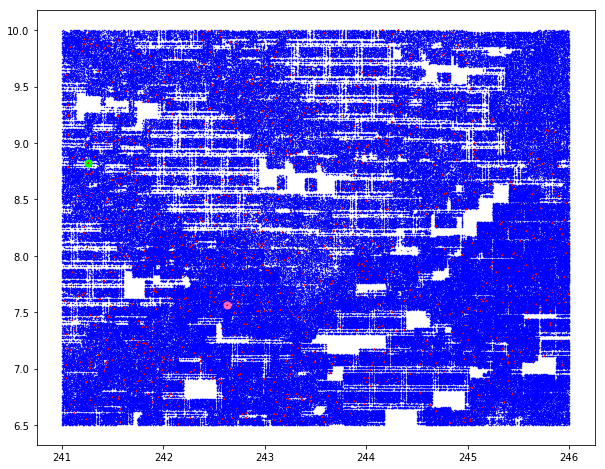

In [31]:
plt.scatter(ra_BKG, dec_BKG, s=0.1, color='blue', marker='o')
plt.scatter(ra_LRG[535], dec_LRG[535], s=50, color='hotpink')
plt.scatter(ra_LRG[117], dec_LRG[117], s=50, color='lime')
plt.scatter(ra_LRG, dec_LRG, s=1, color='red', marker='+')
plt.show()